CARGA DE LIBRERIAS

# ENTREGA Nº 1

**BASE DE DATOS**

Para el presente proyecto se utilizará un DATASET de clientes de una entidad bancaria, que contiene la información de más de 10,000 clientes entre los que se divide en clientes que aun se mantienen y clientes que abandonaron.


**Link de la base de datos (CSV)**
https://drive.google.com/drive/u/0/folders/1QFG0NAqYDlzriVYBwutW5l4vZMSDftiD

**RESUMEN/ABSTRACT**
Las instituciones financieras se ven afectadas año tras año por el abandono o desercisión de sus clientes esto puede estar impulsado por varios factores, ademas el sistema financiero se encuentra en un contexto de transformación digital y regulaciones más estrictas debido a los recientes escándalos financieros.

Uno de los motivos por los que los clientes pueden abandonar un banco son los altos costos asociados a la banca, así como la falta de transparencia y confianza en los servicios que ofrecen. También pueden influir la mala calidad del servicio al cliente o la falta de innovación tecnológica para brindar soluciones y experiencias satisfactorias.

Las consecuencias de la pérdida de clientes para los bancos son la disminución de sus ingresos y su capacidad para invertir en nuevos proyectos, así como una posible pérdida de reputación en el mercado.

Para prevenir la fuga de clientes, es importante que los bancos adopten medidas para mejorar la calidad de sus servicios, reducir los costos y aumentar la transparencia en su relación con los clientes. Además, deberían invertir en tecnología para brindar soluciones más innovadoras y satisfactorias para los clientes.

Los retos a futuro en este ámbito incluyen la continua transformación digital, la competencia creciente en el mercado y la necesidad de adaptarse a las regulaciones cada vez más estrictas. Para estudiar estos casos de abandono de clientes, se pueden emplear técnicas de análisis de datos para identificar patrones y tendencias en el comportamiento de los clientes y así tomar medidas preventivas para retenerlos.

**OBJETIVOS**

El DATASET contiene información de los cliente de una cartera de tarjetas de crédito de consumo. El objetivo del proyecto es construir un modelo de clasificación que prediga la deserción de clientes, de esta forma poder realizar acciones para la mejora y para la retención de clientes, asi mismo personalizar las campañas de retención a los clientes con mayor probabilidad de irse, optimizando el presupuesto de la empresa.

Para el proyecto trabajaremos comprobando las variables que mejor explican si es probable que un cliente abandone la empresa.

**VARIABLES DEL DATASET**

**Nombre de columna** => Descripción

**CLIENTNUM** => Identificador único para cada cliente.

**Attrition_Flag** => Marca que indica si el cliente se ha ido o no. 

**Customer_Age** => Edad del cliente. 

**Gender** => Sexo del cliente. 

**Dependent_count** => Número de dependientes que tiene el cliente. 

**Education_Level** => Nivel educativo del cliente. 

**Marital_Status** => Estado civil del cliente. 

**Income_Category** => Categoría de ingresos del cliente. 

**Card_Category** => Tipo de tarjeta que posee el cliente. 

**Months_on_book** => Cuánto tiempo ha estado el cliente en los libros. 

**Total_Relationship_Count** => Número total de relaciones que el cliente tiene 
con el proveedor de la tarjeta de crédito. 

**Months_Inactive_12_mon** => Número de meses que el cliente ha estado inactivo en los últimos doce meses. 

**Contacts_Count_12_mon** => Número de contactos que el cliente ha tenido en los últimos doce meses. 

**Credit_Limit** => Límite de crédito del cliente. 

**Total_Revolving_Bal** => Saldo rotativo total del cliente. 

**Avg_Open_To_Buy** => Proporción promedio de apertura para comprar del cliente. 

**Total_Amt_Chng_Q4_Q1** => Importe total cambiado del trimestre 4 al trimestre 1. 

**Total_Trans_Amt** => Importe total de la transacción. 

**Total_Trans_Ct** => Recuento total de transacciones. 

**Total_Ct_Chng_Q4_Q1** => El recuento total cambió del trimestre 4 al 
trimestre 1. 

**Avg_Utilization_Ratio** => Proporción de utilización promedio del cliente. 


In [ ]:
#carga de librerias#

import pandas as pd
import numpy as np
import xlrd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import seaborn as sns


CARGA DE BASE DE DATOS

In [ ]:
from google.colab import files 

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


BASE DE DATOS 01

VARIABLES DE DATOS
- para el presente estudio se busca analizar la relación o influencia que existiera sobre el abandono de clientes como consecuencia de una serie de factores(datos) como lo son ingesos promedio, linea de credito, usos durante el año, mes, categoria de cliente, estado civil u/o nivel de educación.

In [ ]:
df_bank = pd.read_csv("/content/drive/MyDrive/CODER DATA SCIENCE HENRY VALVERDE/DATA/customer_desertion.csv")
df_bank.shape
df_bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
df_bank = df_bank.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [ ]:
df_bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


TIPOS DE DATOS

In [ ]:
df_bank.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

ANÁLISIS DE NULOS

In [ ]:
df_bank.isna().sum().sort_values(ascending = False)

CLIENTNUM                   0
Months_Inactive_12_mon      0
Total_Ct_Chng_Q4_Q1         0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Total_Relationship_Count    0
Attrition_Flag              0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Customer_Age                0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
df_bank['Attrition_Flag'].value_counts(normalize=True)*100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

In [ ]:
c_status = df_bank.groupby(['Attrition_Flag'])['CLIENTNUM'].count().to_frame().reset_index()
c_status

,Attrition_Flag,CLIENTNUM
0,Attrited Customer,1627
1,Existing Customer,8500


# **ENTREGA Nº 2**


**GRAFICO 01**

Para este grafico se busco establecer cual es el porcentaje de clientes actuales asi como el porcentaje de clientes que abandonaron el banco

usando un grafico tipo pastel

In [ ]:
labels = c_status.Attrition_Flag
values = c_status.CLIENTNUM

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2])])
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.50,
    xanchor="left",
    x=0.10
))

**GRAFICO 02**

Para este grafico se busco establecer cual es el porcentaje de clientes actuales asi como el porcentaje de clientes que abandonaron el banco

usando un grafico de barras

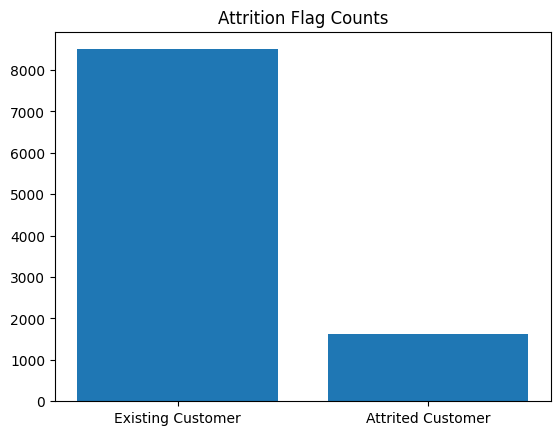

In [ ]:
counts = df_bank['Attrition_Flag'].value_counts()
fig, ax = plt.subplots()
labels = ['Existing Customer', 'Attrited Customer']
values = [counts[0], counts[1]]
ax.bar(labels, values)
ax.set_title('Attrition Flag Counts')
plt.show()

In [ ]:
df_bank['Attrition_Flag'] = df_bank.Attrition_Flag.map({'Existing Customer':0, 'Attrited Customer':1})

**GRAFICO 03**

Este grafico representa el nivel de educación de los clientes del banco 

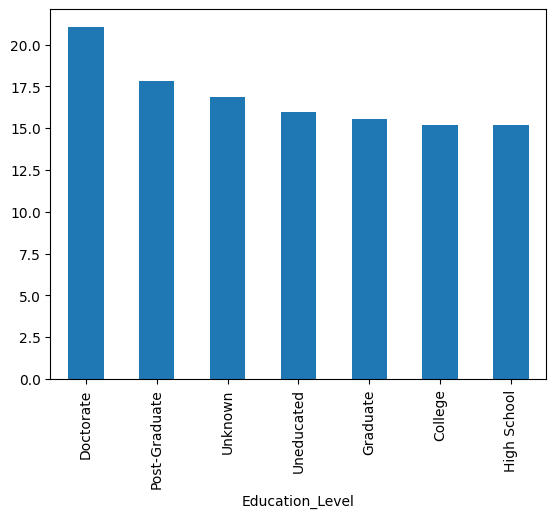

In [ ]:
temp = df_bank.groupby('Education_Level').Attrition_Flag.mean().sort_values(ascending = False) * 100
temp.plot.bar();

**GRAFICO 04**

Este grafico representa el estado civil de los clientes del banco 

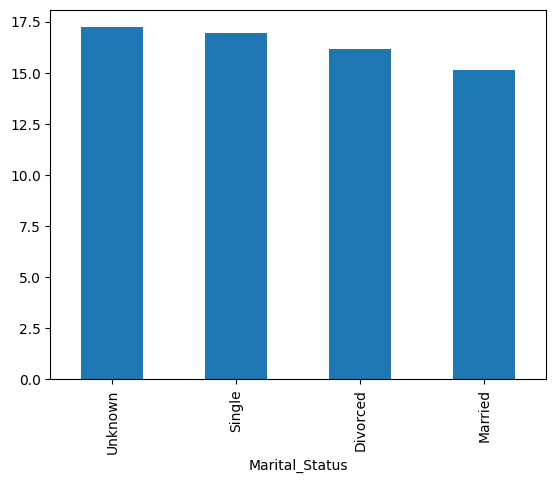

In [ ]:
temp = df_bank.groupby('Marital_Status').Attrition_Flag.mean().sort_values(ascending = False) * 100
temp.plot.bar();

**GRAFICO 05**

Este grafico representa el genero de los clientes del banco

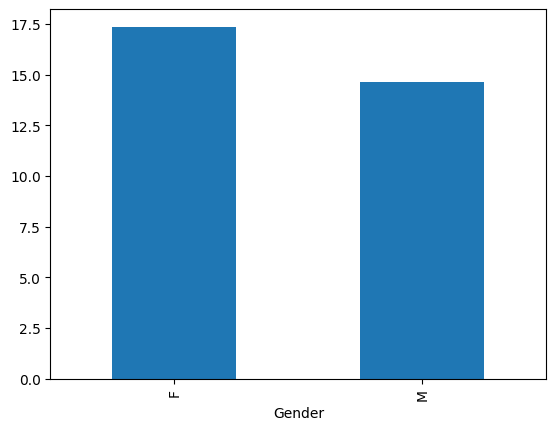

In [ ]:
temp = df_bank.groupby('Gender').Attrition_Flag.mean().sort_values(ascending = False) * 100
temp.plot.bar();

**GRAFICO 05**

Este grafico busca representar el nivel de ingresos de los clientes en general del banco


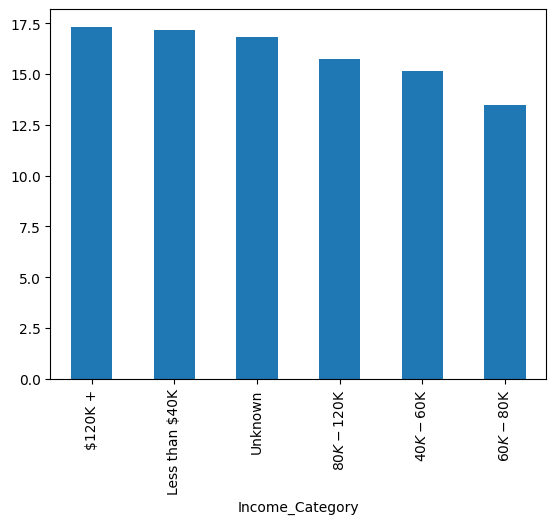

In [ ]:
temp = df_bank.groupby('Income_Category').Attrition_Flag.mean().sort_values(ascending = False) * 100
temp.plot.bar();

In [ ]:
df_bank


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


<Axes: xlabel='Attrition_Flag', ylabel='count'>

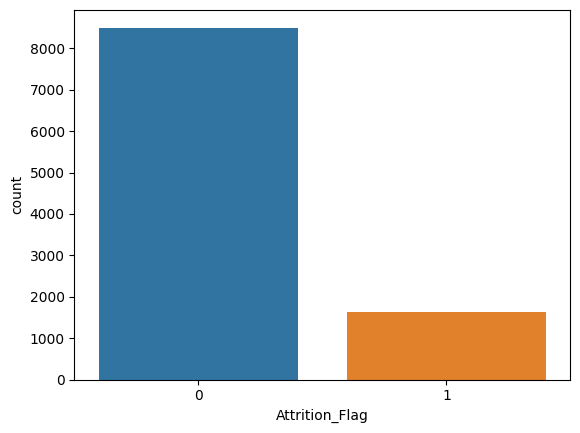

In [ ]:
sns.countplot(x='Attrition_Flag', data=df_bank)

**GRAFICO 06**

En el siguiente grafico representa la edad de los clientes tanto actuales como los que abandonaron el banco 

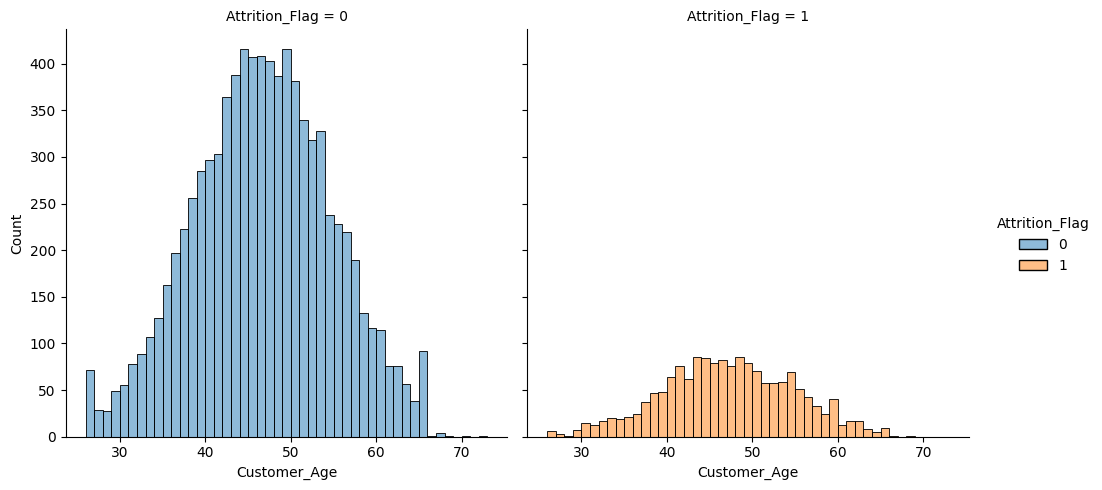

In [ ]:
# Multiples figuras (Figure-level)
sns.displot(data=df_bank, x="Customer_Age", hue="Attrition_Flag", col="Attrition_Flag")
plt.show()

**GRAFICO 07**

En el siguiente grafico representa el genero de los clientes tanto actuales como los que abandonaron el banco

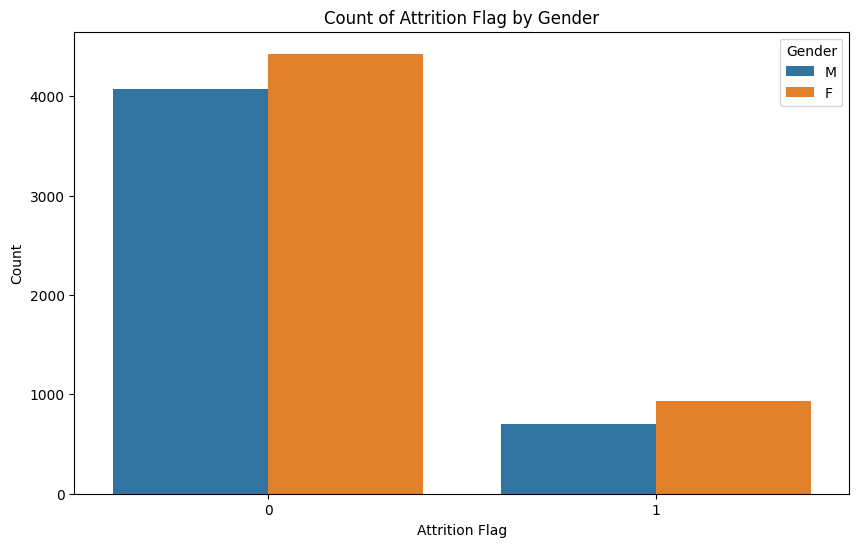

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_bank, x='Attrition_Flag', hue='Gender')
plt.title('Count of Attrition Flag by Gender')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()

**GRAFICO 08**

En el siguiente grafico representa la categoria de tarjeta de los clientes tanto actuales como los que abandonaron el banco

<Figure size 2000x1200 with 0 Axes>

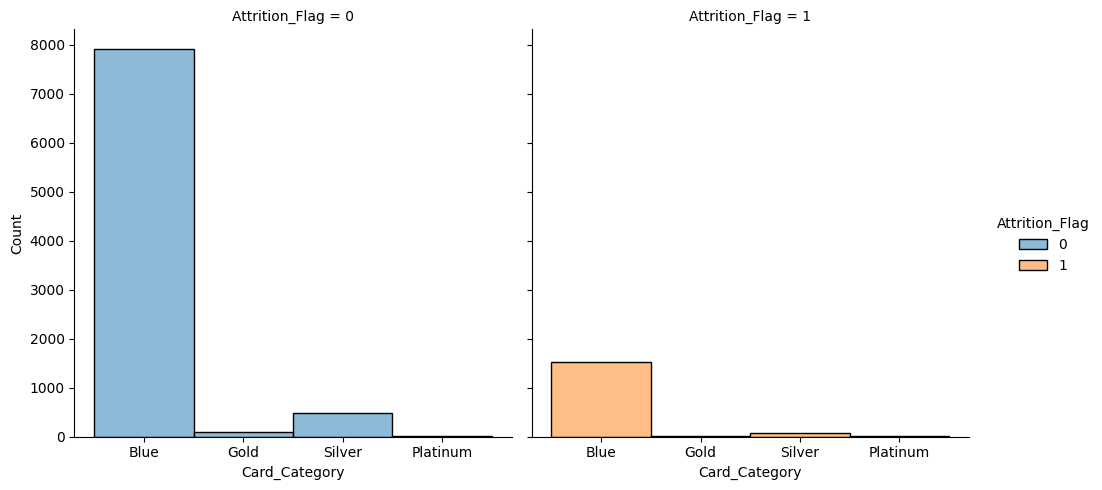

In [ ]:
plt.figure(figsize=(20,12))
sns.displot(data=df_bank, x="Card_Category", hue="Attrition_Flag", col="Attrition_Flag")
plt.show()

**GRAFICO 09**

En el siguiente grafico representa segun la categoria de tarjeta del cliente con relacion a los ingresos de los mismos

<Figure size 2000x1200 with 0 Axes>

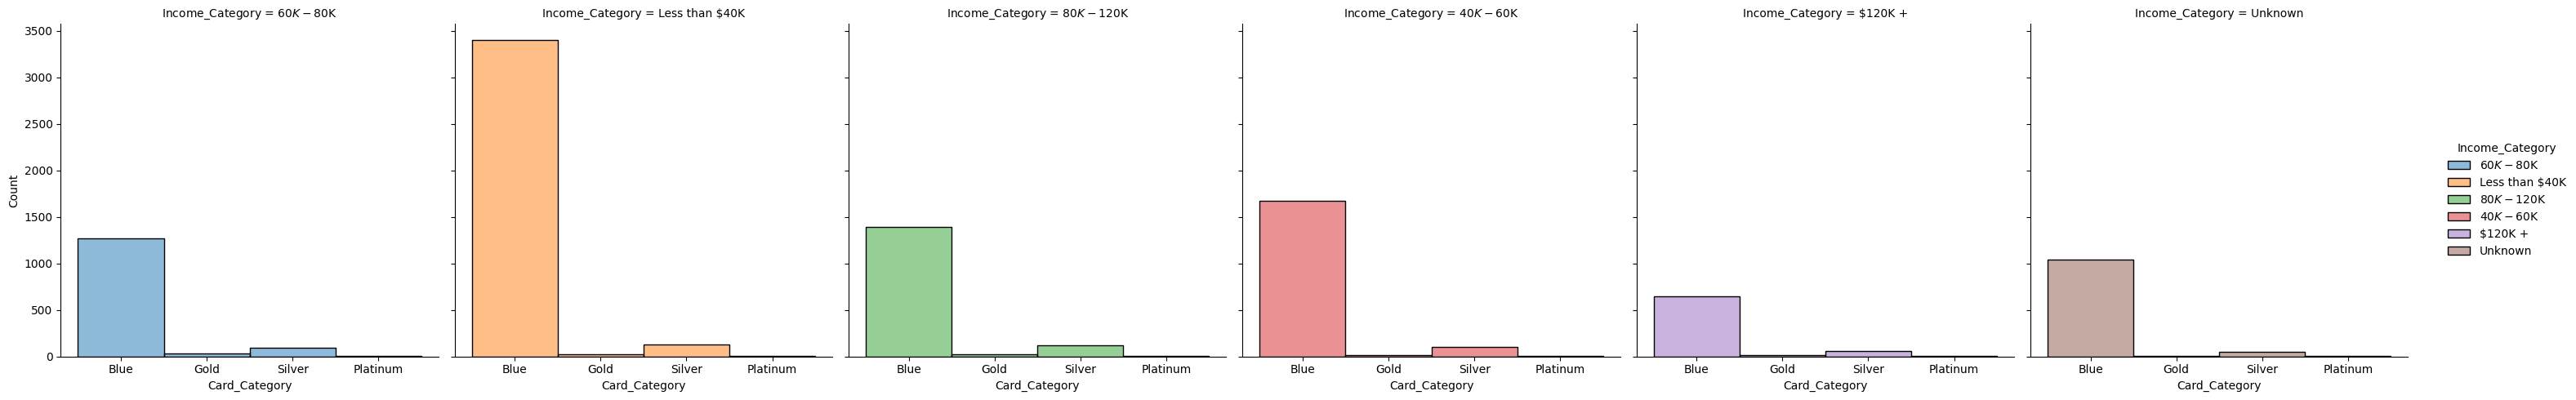

In [ ]:
plt.figure(figsize=(20,12))
sns.displot(data=df_bank, x="Card_Category", hue="Income_Category", col="Income_Category")
plt.show()

**GRAFICO 10**

En los siguientes graficos muestran una visualizacion de los clientes en relacion de diferentes aspectos de la informacion de los clientes como lo son (limite de credito, tiempo con el banco, numero de productos y la edad del cliente)

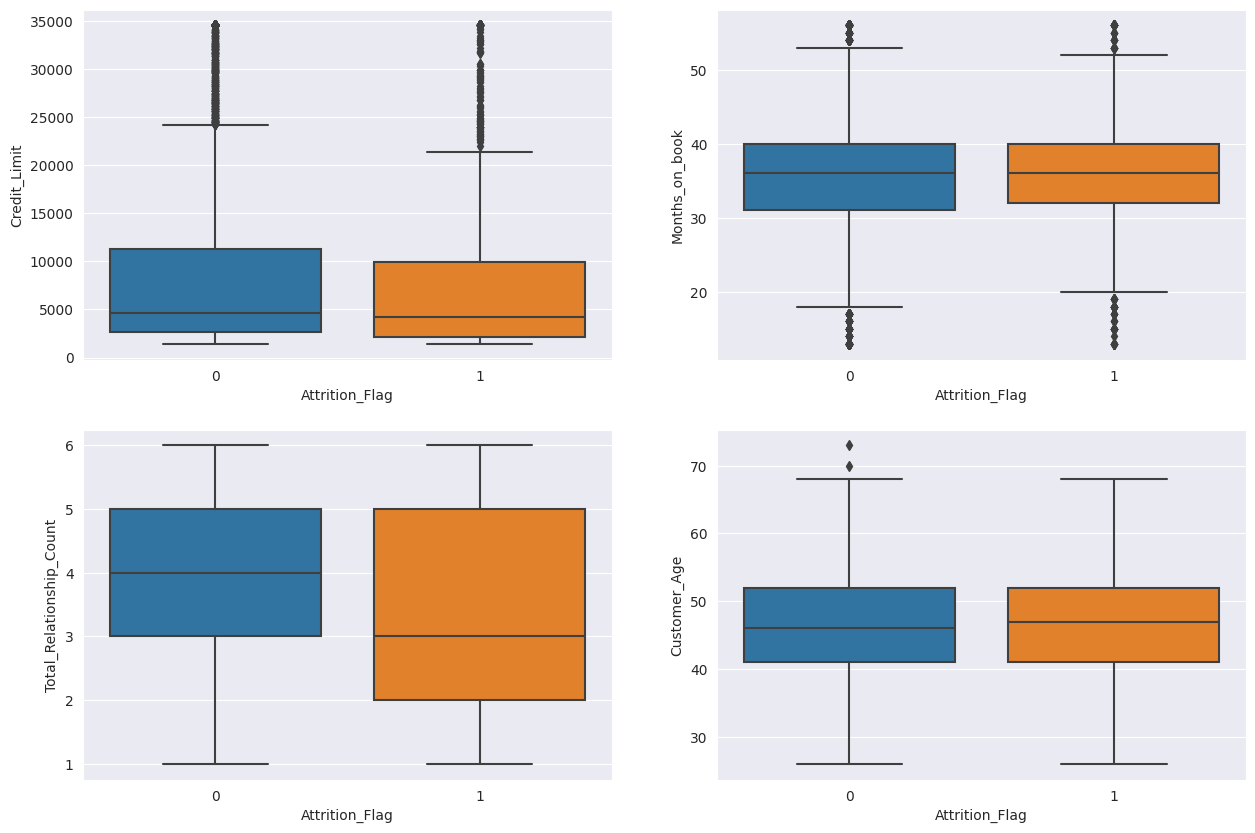

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')

plt.subplot(2,2,1)
sns.boxplot(x='Attrition_Flag', y='Credit_Limit',data=df_bank);

plt.subplot(2,2,2)
sns.boxplot(x='Attrition_Flag', y='Months_on_book',data=df_bank);

plt.subplot(2,2,3)
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count',data=df_bank);

plt.subplot(2,2,4)
sns.boxplot(x='Attrition_Flag', y='Customer_Age',data=df_bank);

# **ENTREGA Nº 3**

**RESUMEN/ABSTRACT**
Las instituciones financieras se ven afectadas año tras año por el abandono o desercisión de sus clientes esto puede estar impulsado por varios factores, ademas el sistema financiero se encuentra en un contexto de transformación digital y regulaciones más estrictas debido a los recientes escándalos financieros.

Uno de los motivos por los que los clientes pueden abandonar un banco son los altos costos asociados a la banca, así como la falta de transparencia y confianza en los servicios que ofrecen. También pueden influir la mala calidad del servicio al cliente o la falta de innovación tecnológica para brindar soluciones y experiencias satisfactorias.

Las consecuencias de la pérdida de clientes para los bancos son la disminución de sus ingresos y su capacidad para invertir en nuevos proyectos, así como una posible pérdida de reputación en el mercado.

Para prevenir la fuga de clientes, es importante que los bancos adopten medidas para mejorar la calidad de sus servicios, reducir los costos y aumentar la transparencia en su relación con los clientes. Además, deberían invertir en tecnología para brindar soluciones más innovadoras y satisfactorias para los clientes.

Los retos a futuro en este ámbito incluyen la continua transformación digital, la competencia creciente en el mercado y la necesidad de adaptarse a las regulaciones cada vez más estrictas. Para estudiar estos casos de abandono de clientes, se pueden emplear técnicas de análisis de datos para identificar patrones y tendencias en el comportamiento de los clientes y así tomar medidas preventivas para retenerlos.

**HIPOTESIS**


PREGUNTA 01: ¿Existe una relación entre los clientes (abandonaron o existentes) y sus ingresos?

PREGUNTA 02:¿hay un determinado tiempo de vida de los clientes que abandonaron, cual es el punto critico?

PREGUNTA 03:¿Existe relación entre monto total de transacciones y la cantidad de transacciones?

PREGUNTA 04:¿Existe relación entre monto total de transacciones y la cantidad de transacciones?

**VISUALIZACIONES**

Desarrollo PREGUNTA 01
según el grafico NO existe relación entre sus ingresos y los casos de abandono y permanencia

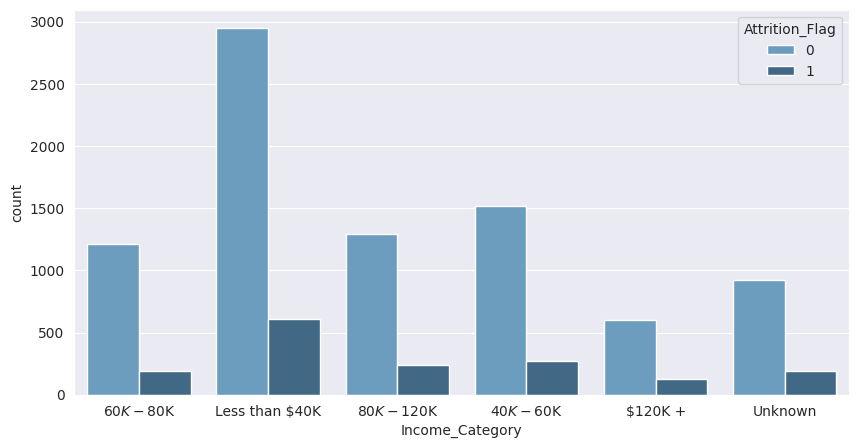

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income_Category',data=df_bank,palette='Blues_d',hue='Attrition_Flag');

Desarrollo de PREGUNTA 02 según la visualización existe una alta tasa de abandono de clientes despues de los 36 meses

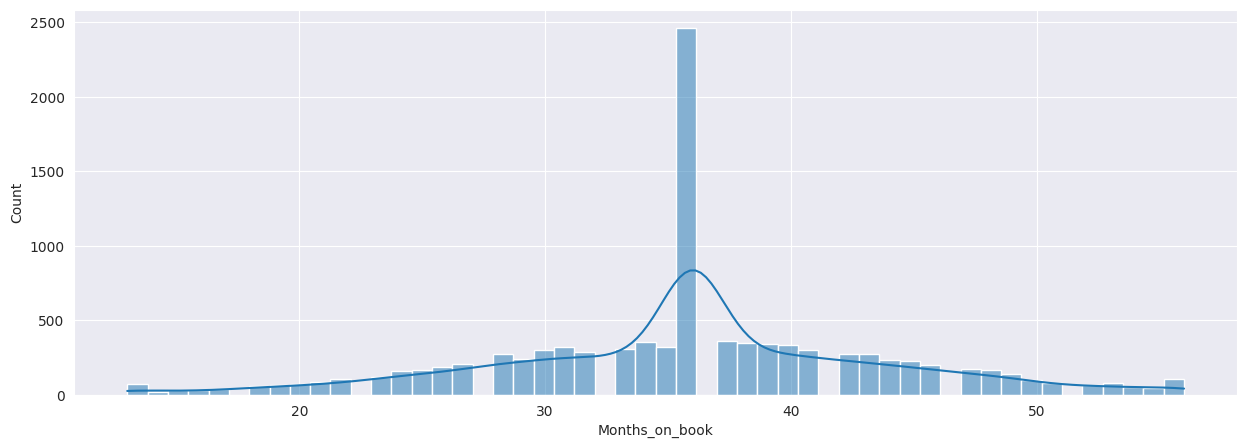

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='Months_on_book',data=df_bank,kde=True);

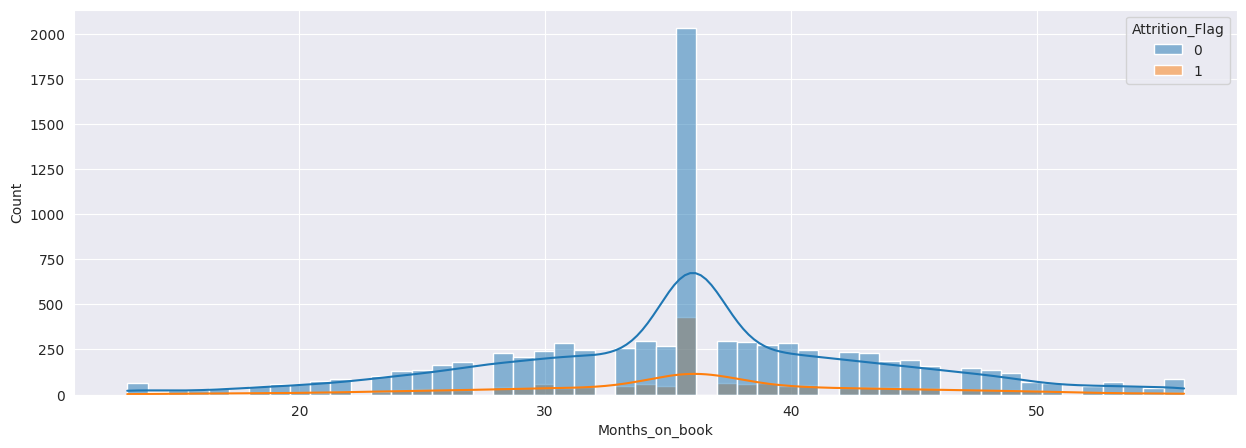

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='Months_on_book',data=df_bank,kde=True,hue='Attrition_Flag');

Desarrollo de PREGUNTA 03 hay una correlación positiva entre Monto total de la transacción VS. Recuento total de transacciones

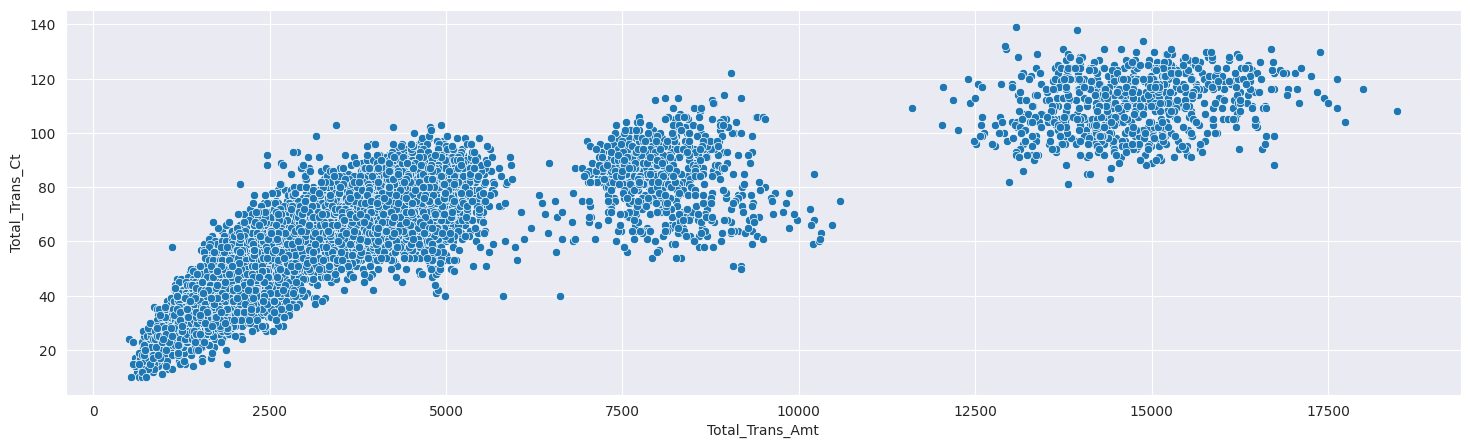

In [ ]:
plt.figure(figsize=(18,5))
sns.scatterplot(x='Total_Trans_Amt',y='Total_Trans_Ct',data=df_bank);

Desarrollo de PREGUNTA 04 hay una correlación positiva entre Monto total de la transacción VS. Recuento total de transacciones

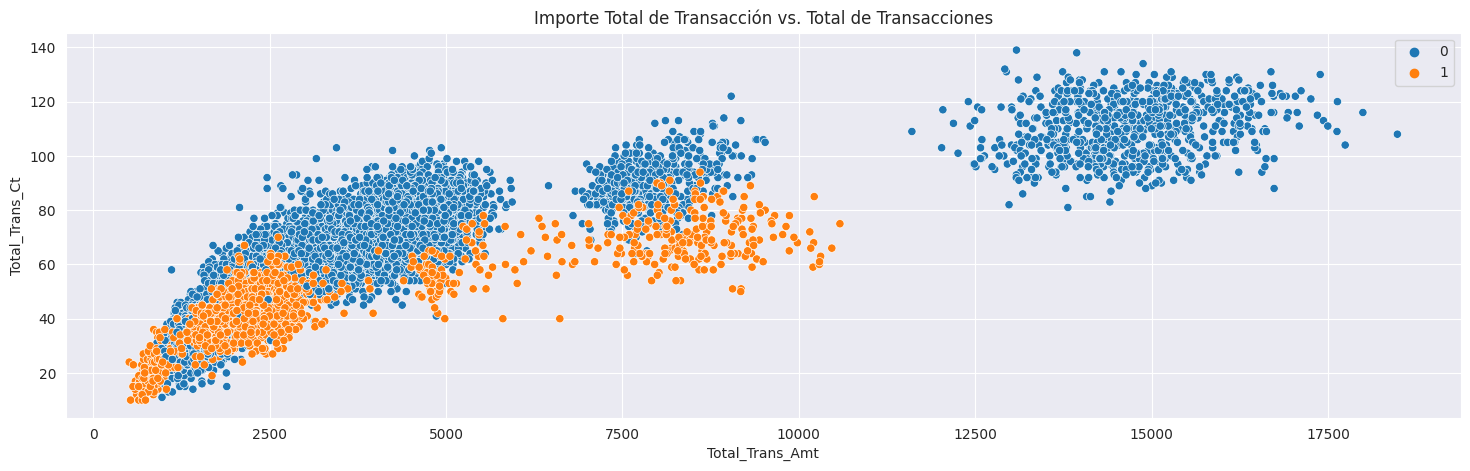

In [ ]:
plt.subplots(figsize=(18, 5))
sns.scatterplot(x = "Total_Trans_Amt", y = "Total_Trans_Ct", hue = "Attrition_Flag", data = df_bank)
plt.title("Importe Total de Transacción vs. Total de Transacciones")
plt.legend(loc = "upper right")
plt.show()
plt.close()

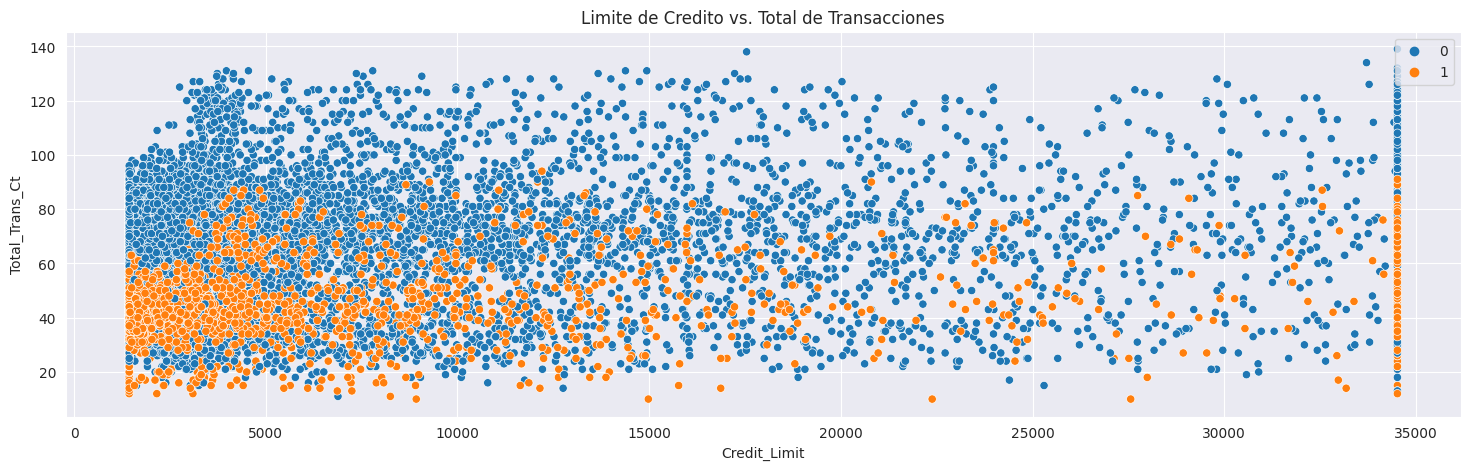

In [ ]:
plt.subplots(figsize=(18, 5))
sns.scatterplot(x = "Credit_Limit", y = "Total_Trans_Ct", hue = "Attrition_Flag", data = df_bank)
plt.title("Limite de Credito vs. Total de Transacciones")
plt.legend(loc = "upper right")
plt.show()
plt.close()

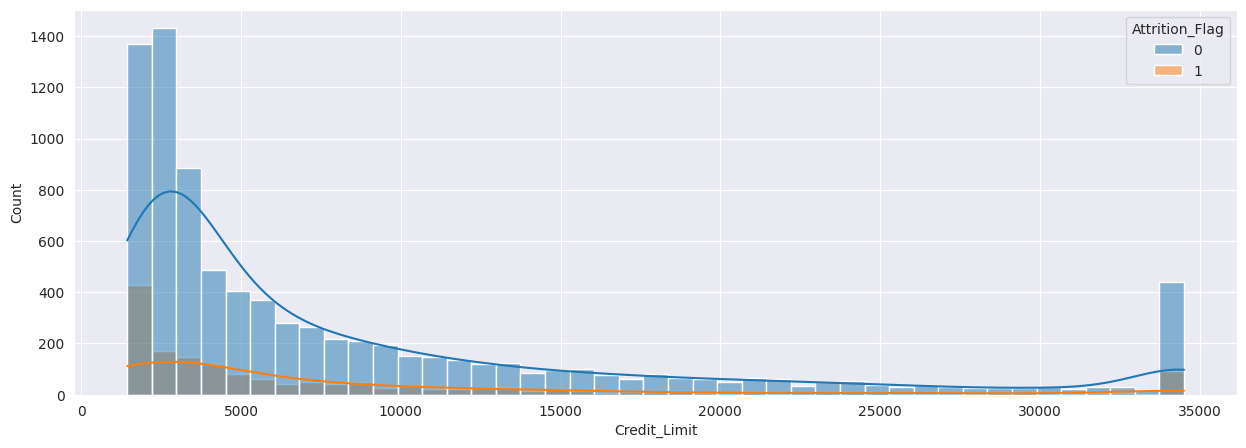

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='Credit_Limit',data=df_bank,kde=True,hue='Attrition_Flag');

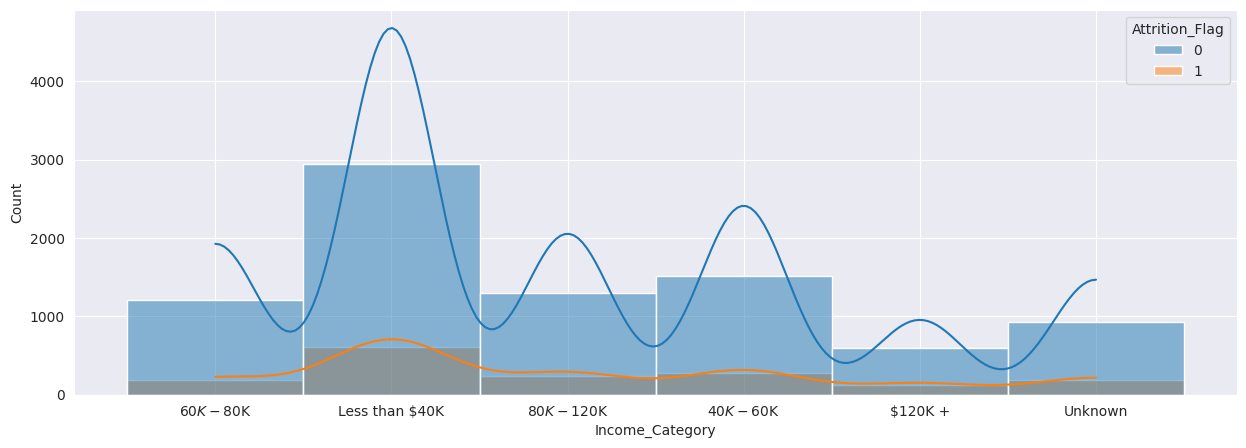

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='Income_Category',data=df_bank,kde=True,hue='Attrition_Flag');

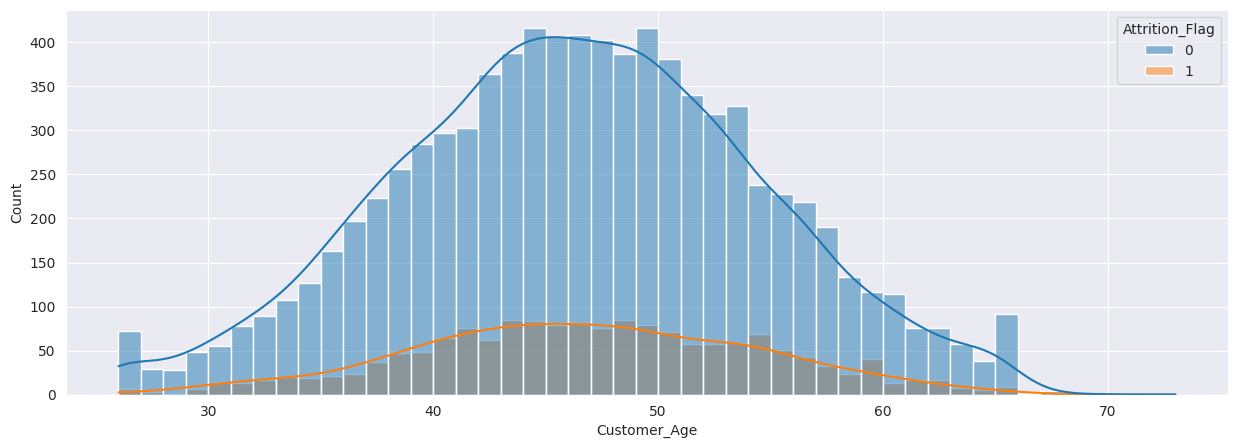

In [ ]:
# Gráfico de las edades de los clientes
plt.figure(figsize=(15,5))
sns.histplot(x='Customer_Age',data=df_bank,kde=True,hue='Attrition_Flag');

<ipython-input-35-ea55e7486cd0>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Matrix de Correlación')

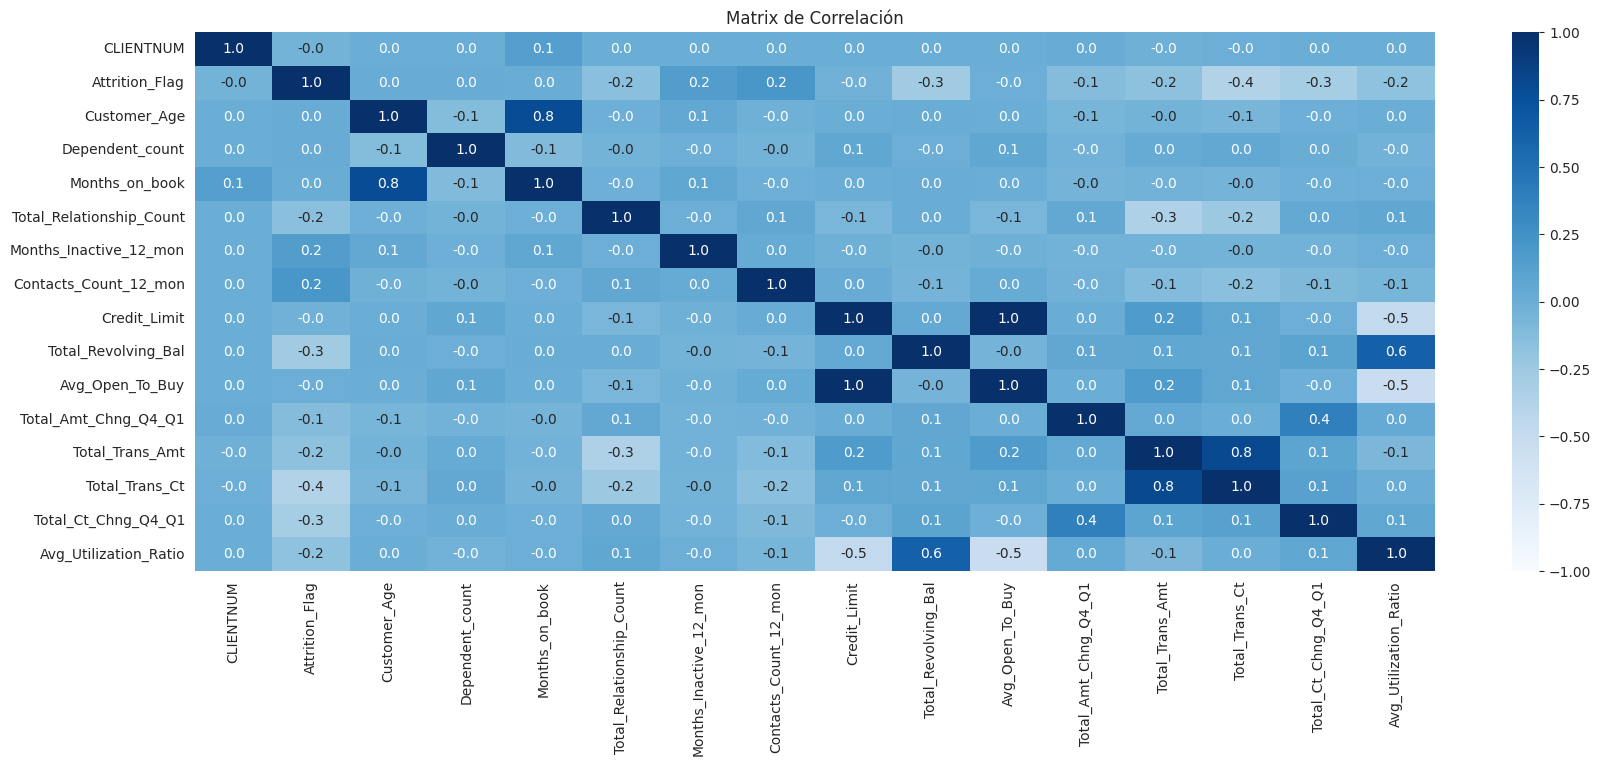

In [ ]:
# Gráfico de la matrix de correlación
plt.figure(figsize=(20,7))
correlation=df_bank.corr()
sns.heatmap(correlation,vmin=-1.0,
    vmax=1.0,
    cmap='Blues',
    annot=True,
    fmt='.1f',
    linecolor='white',
    cbar=True);
plt.title("Matrix de Correlación")

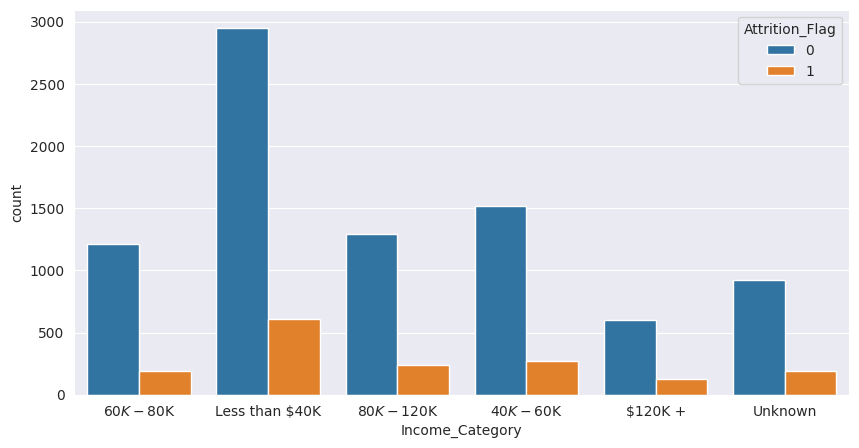

In [ ]:
# Gráfico de las categorias según ingresos
plt.figure(figsize=(10,5))
sns.countplot(x='Income_Category',data=df_bank,hue='Attrition_Flag')
plt.show()

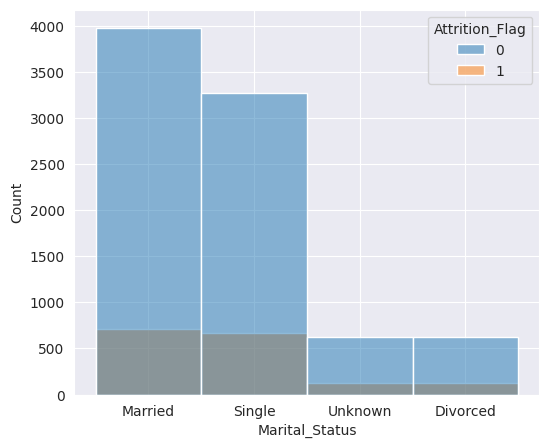

In [ ]:
# Gráfico estado civil de clientes
plt.figure(figsize=(6,5))
sns.histplot(x='Marital_Status',hue='Attrition_Flag',data=df_bank)
plt.show()

**RESULTADOS**

PROBLEMA 01: ¿Existe una relación entre los clientes (abandonaron o existentes) y sus ingresos?
Desarrollo hipotesis 01
según el grafico NO existe relación entre sus ingresos y los casos de abandono y permanencia

PROBLEMA 02:¿hay un determinado tiempo de vida de los clientes que abandonaron, cual es el punto critico?
Desarrollo de hipotesis 02 según la visualización existe una alta tasa de abandono de clientes despues de los 36 meses

PROBLEMA 03:¿Existe relación entre monto total de transacciones y la cantidad de transacciones?
Desarrollo de hipotesis 03 hay una correlación positiva entre Monto total de la transacción VS. Recuento total de transacciones

# ENTREGA Nº 4

**RESUMEN/ABSTRACT** en la ENTREGA Nº 3

**CONTEXTO EMPRESARIAL** 

La entidad financiera de estudio se encuentra preocupada debido a que el porcentaje de clientes que abandonaron el banco tiene una tasa del 16.1% algo menos que aceptable para la gerencia.

Para combatir el abandono de clientes el banco a proporcionado una base de datos de sus clientes para que sean sometidos a diversos análisis con el fin de poder determinar los principales factores internos que podrian estar influyendo en el abandono de los clientes y de esta poder indentificar a futuro cuando un cliente tenga altas probabilidades de abandono.

**OBJETIVOS**

El DATASET contiene información de los cliente de una cartera de tarjetas de crédito de consumo. El objetivo del proyecto es construir un modelo de clasificación que prediga la deserción de clientes, de esta forma poder realizar acciones para la mejora y para la retención de clientes, asi mismo personalizar las campañas de retención a los clientes con mayor probabilidad de irse, optimizando el presupuesto de la empresa.

Para el proyecto trabajaremos comprobando las variables que mejor explican si es probable que un cliente abandone la empresa.

**PROBLEMA COMERCIAL** Identificar que variables deben ser monitoreadas debido a la sensibilidad que representan como factor influyente en el abandono de los clientes al banco

**CONTEXTO ANÁLITICO**

Se a proporcionado un archivo CSV (almacenado en la carpeta datos ya creada) que contiene detalles sobre cada cliente como, Id de cliente, Edad del cliente, Número de dependientes que tiene el cliente, Nivel educativo del cliente, Categoría de ingresos del cliente, Tipo de tarjeta que posee el cliente, Límite de crédito del cliente, Importe total de la transacción, Recuento total de transacciones, entre otros

Se busca responder las siguientes interrogantes:

**1.¿Qué segmento de clientes tienen una mayor incidencia de abandono?¿cual es el procentanje de clientes que abandonan?**

**2.¿La linea de credito de los clientes podría considerarse un factor influyente para el abandono de cliente?**

**3.¿Los clientes propensos a abandonar generan mas operaciones?¿en que rango se encuentran estos movimientos?**

**4.¿En el abandono de clientes, podría considerarse la edad un factor influyente?**

**5.¿Cual es tiempo promedio en el que se encuentran los clientes que abandonan, existe algun punto critico a considerar?**

In [ ]:
df_bank.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
df_bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

**1.¿Qué segmento de clientes tienen una mayor incidencia de abandono?¿cual es el procentanje de clientes que abandonan?**

Para responder a esta pregunta se buscara conocer primero los siguientes puntos:

Número de clientes por categoria, cuantos clientes abandonaron por cada una y que procentaje del total representan estos clientes, finalmente se relizará un gráfico para visualizar la información (se realizaron tres graficos sobre los mismos datos)

*Como se logra observar los clientes de los segmentos con ingresos menores a los US 40K y los que tienen ingresos mayores a US 120K presentan una incidencia mayor en la tasa de abandono de un 17.18% y 17.33% respectivamente.*

*Así mismo se observa que los clientes con ingresos medios–US 60,000
a US 80,000 tienen el menor porcentaje de casos de abandono 13.48%*

In [ ]:
# Número de clientes por categoría
df_bank.groupby('Income_Category').size()

Income_Category
$120K +            727
$40K - $60K       1790
$60K - $80K       1402
$80K - $120K      1535
Less than $40K    3561
Unknown           1112
dtype: int64

In [ ]:
# Total de clientes que existen y abandonaron
df_bank.groupby('Attrition_Flag').size()

Attrition_Flag
0    8500
1    1627
dtype: int64

In [ ]:
total_clientes_por_categoria = df_bank.groupby('Income_Category')['Attrition_Flag'].count()
porcentaje_abandono_por_categoria = df_bank.groupby('Income_Category')['Attrition_Flag'].sum() / total_clientes_por_categoria * 100
tabla_resultados = pd.concat([total_clientes_por_categoria, porcentaje_abandono_por_categoria], axis=1)
tabla_resultados.columns = ['Total de Clientes', 'Porcentaje de Abandono']
print(tabla_resultados)

                 Total de Clientes  Porcentaje de Abandono
Income_Category                                           
$120K +                        727               17.331499
$40K - $60K                   1790               15.139665
$60K - $80K                   1402               13.480742
$80K - $120K                  1535               15.765472
Less than $40K                3561               17.186184
Unknown                       1112               16.816547


In [ ]:
# Calcular el número de clientes por categoría
num_clientes_por_categoria = df_bank.groupby('Income_Category')['Attrition_Flag'].count()

# Calcular el número de clientes que abandonaron por categoría
num_abandono_por_categoria = df_bank.groupby('Income_Category')['Attrition_Flag'].sum()

# Calcular el porcentaje de abandono por categoría
porcentaje_abandono_por_categoria = num_abandono_por_categoria / num_clientes_por_categoria * 100

# Crear una tabla con los resultados
tabla_resultados = pd.concat([num_clientes_por_categoria, num_abandono_por_categoria, porcentaje_abandono_por_categoria], axis=1)
tabla_resultados.columns = ['Clientes', 'Abandono', 'Porcentaje de Abandono']

# Imprimir los resultados
print(tabla_resultados)


                 Clientes  Abandono  Porcentaje de Abandono
Income_Category                                            
$120K +               727       126               17.331499
$40K - $60K          1790       271               15.139665
$60K - $80K          1402       189               13.480742
$80K - $120K         1535       242               15.765472
Less than $40K       3561       612               17.186184
Unknown              1112       187               16.816547


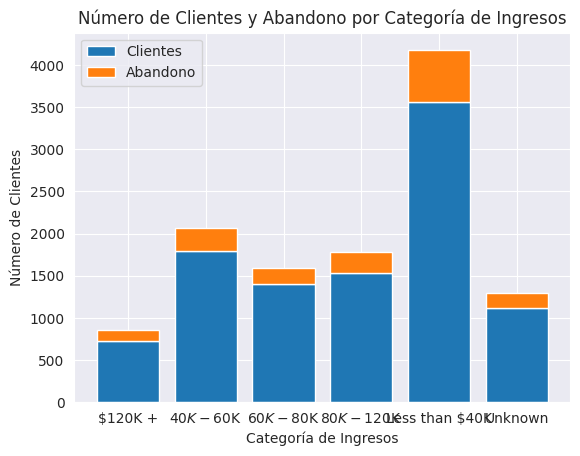

In [ ]:
# Gráfico de barras con los resultados
fig, ax = plt.subplots()
ax.bar(tabla_resultados.index, tabla_resultados['Clientes'], label='Clientes')
ax.bar(tabla_resultados.index, tabla_resultados['Abandono'], bottom=tabla_resultados['Clientes'], label='Abandono')
ax.set_xlabel('Categoría de Ingresos')
ax.set_ylabel('Número de Clientes')
ax.set_title('Número de Clientes y Abandono por Categoría de Ingresos')
ax.legend()
plt.show()

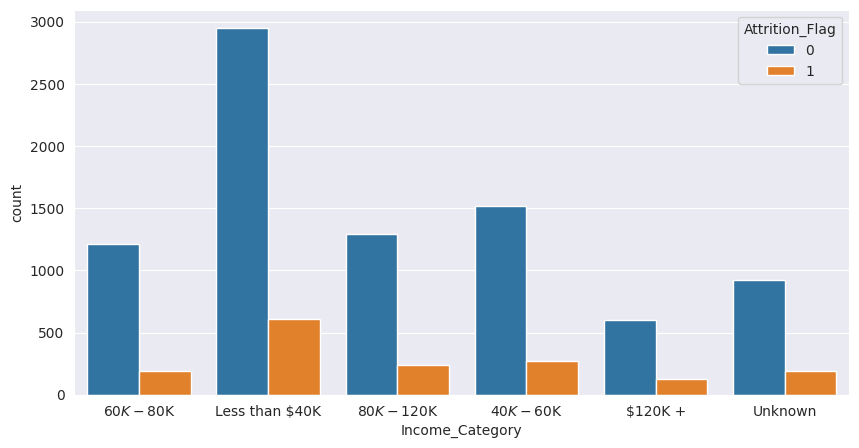

In [ ]:
# Gráfico de las categorias según ingresos
plt.figure(figsize=(10,5))
sns.countplot(x='Income_Category',data=df_bank,hue='Attrition_Flag')
plt.show()

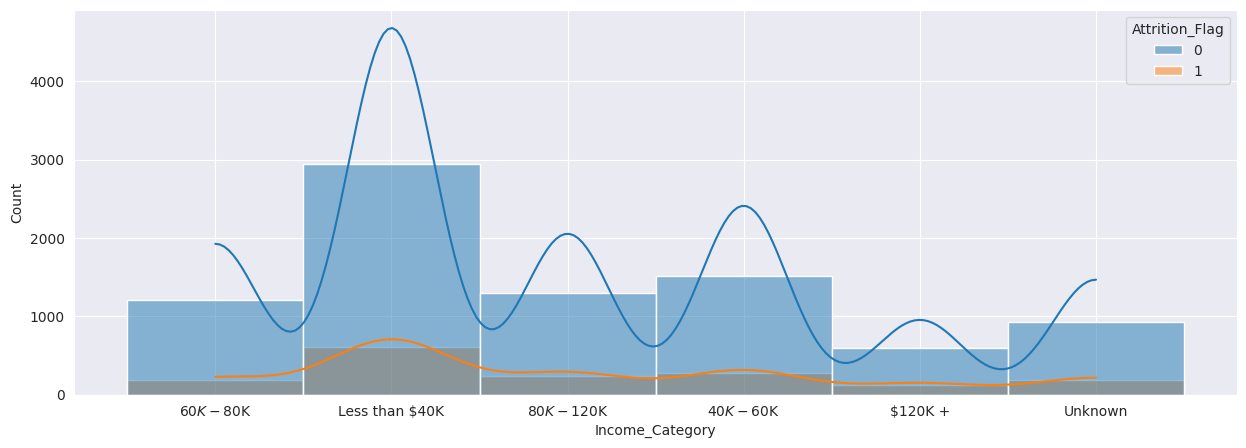

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='Income_Category',data=df_bank,kde=True,hue='Attrition_Flag');

**2.¿La linea de credito de los clientes podría considerarse un factor influyente para el abandono de cliente?**

Se reliazo un cruce de los datos de los clientes segun la linea de credito disponible respecto a los clientes actuales y que abandonaron.

*Según se puede observar en el gráfico la mayoria de clientes tienen una linea de credito inferior a los 5000 dolares esto podría desanlentar a los clientes y se observa que si existe mayor incidencia en el abandono de clientes, esto frente a otras entidades que puedan ofrecerles mejores lineas de credito podría considerarse como motivante para el abandono.*

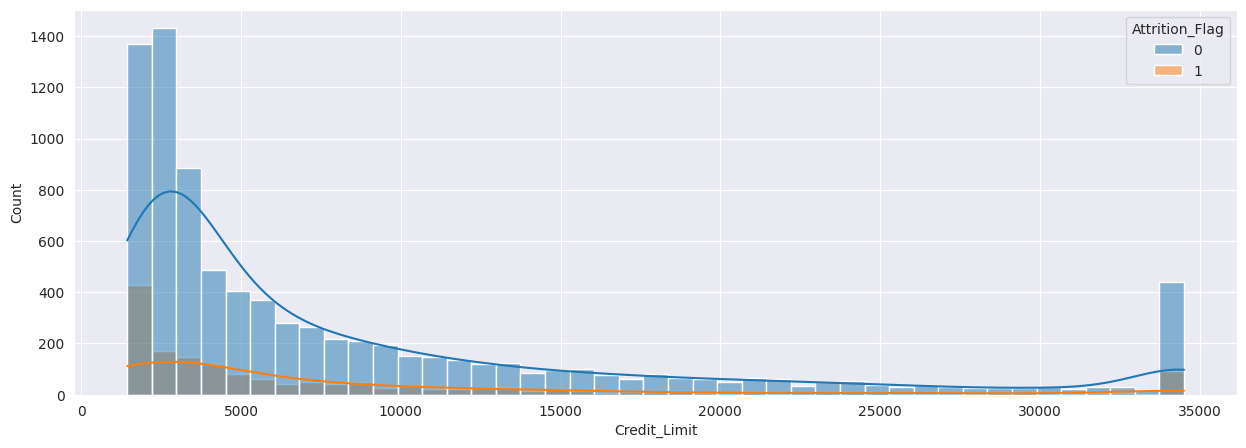

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='Credit_Limit',data=df_bank,kde=True,hue='Attrition_Flag');

**3.¿Los clientes propensos a abandonar generan mas operaciones?¿en que rango se encuentran estos movimientos?**

*Para el análisis de datos respecto al número de transacciones y del total de transacciones realizadas por los clientes se observo tres grupos claramente marcados y que los clientes que abandonaron realizaron transacciones menores a los 12,500 dolares*


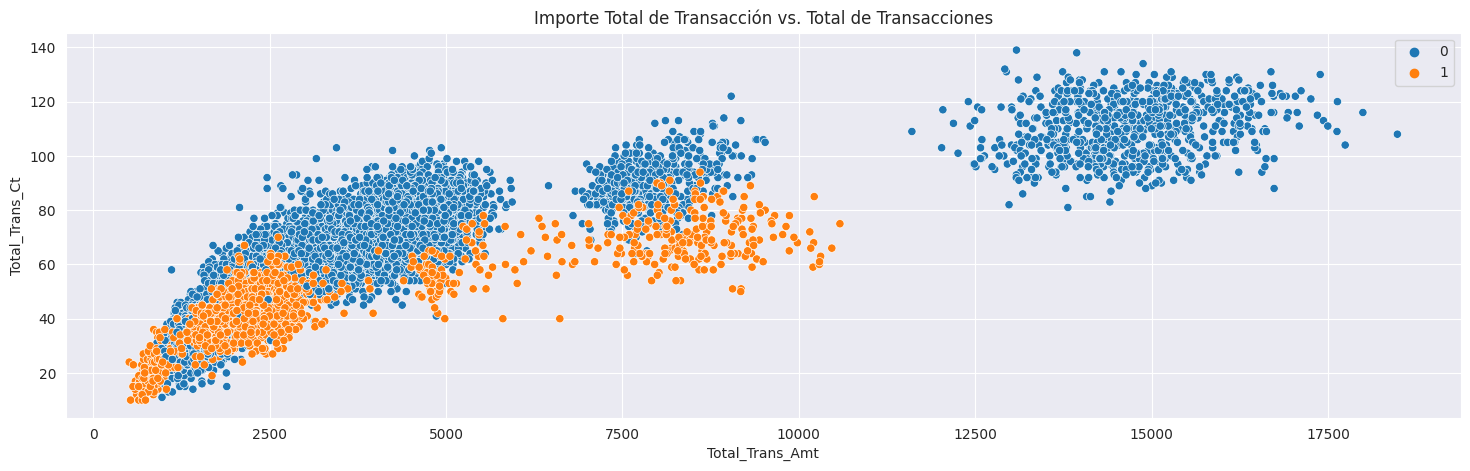

In [ ]:
plt.subplots(figsize=(18, 5))
sns.scatterplot(x = "Total_Trans_Amt", y = "Total_Trans_Ct", hue = "Attrition_Flag", data = df_bank)
plt.title("Importe Total de Transacción vs. Total de Transacciones")
plt.legend(loc = "upper right")
plt.show()
plt.close()

**4.¿En el abandono de clientes, podría considerarse la edad un factor influyente?**

*Realizando el análisis de los datos clientes que abandonaron se observa que la mayor franja se localiza entre las edades medias de 40 a 55 años por lo que se debería estudiar a los clientes cuyas edades se encuentran en los rangos mencionados a fin de cotejar con los otros factores que influyen en el abandono de los clientes.*

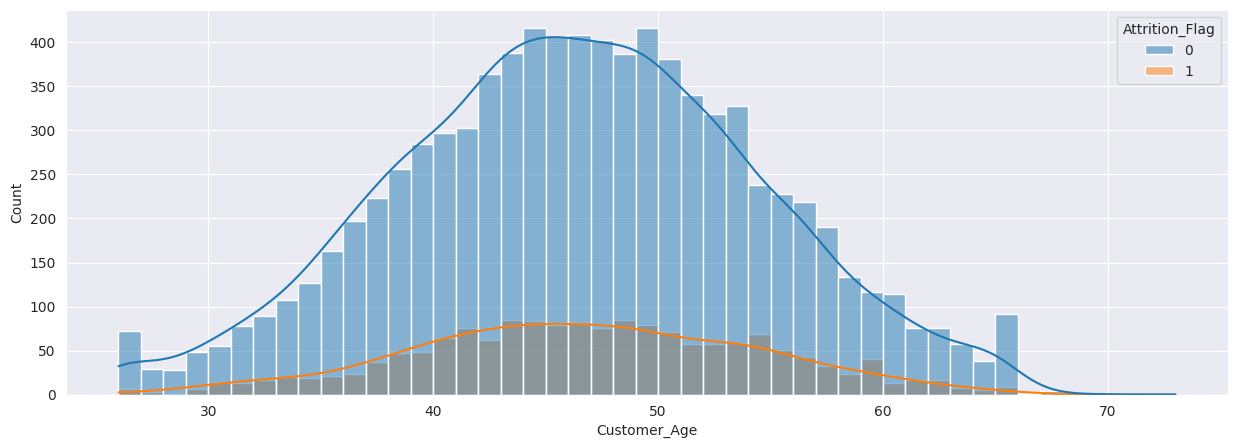

In [ ]:
# Gráfico de las edades de los clientes
plt.figure(figsize=(15,5))
sns.histplot(x='Customer_Age',data=df_bank,kde=True,hue='Attrition_Flag');

**5.¿Cual es tiempo promedio en el que se encuentran los clientes que abandonan, existe algun punto critico a considerar?**

*según la visualización existe una alta tasa de abandono de clientes despues de los 36 meses*

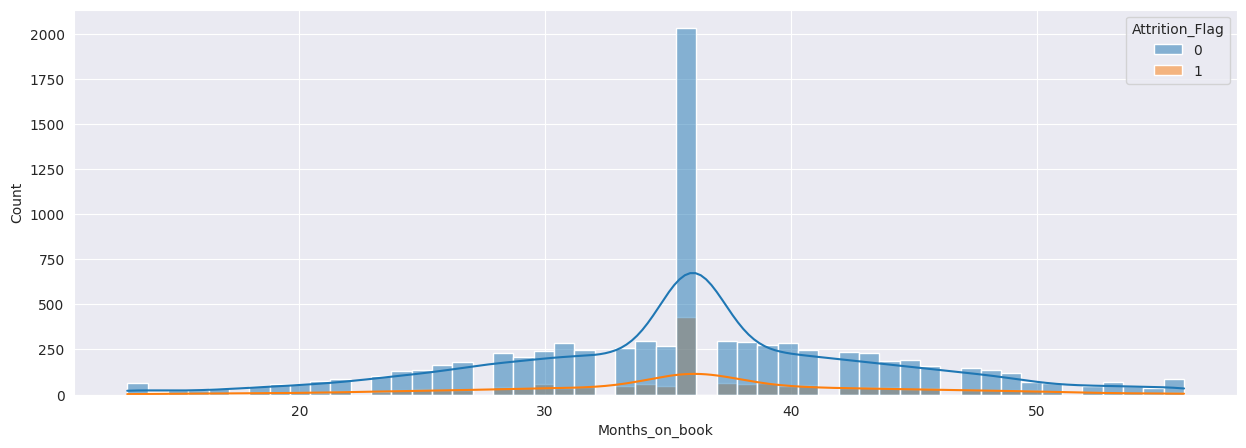

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='Months_on_book',data=df_bank,kde=True,hue='Attrition_Flag');

**CONCLUSIONES**



*   los clientes de los segmentos con ingresos menores a los US 40K y los que tienen ingresos mayores a US 120K presentan una incidencia mayor en la tasa de abandono de un 17.18% y 17.33% respectivamente.
*   Así mismo se observa que los clientes con ingresos medios–US 60,000 a US 80,000 tienen el menor porcentaje de casos de abandono 13.48%
*   La mayoria de clientes tienen una linea de credito inferior a los 5000 dolares esto podría desanlentar a los clientes y se observa que si existe mayor incidencia en el abandono del cliente.
*   Los clientes que abandonaron realizaron transacciones menores a los 12,500 dolares.
*   Despues de los 36 meses existe una mayor incidencia de abandono.
*   Los clientes entre las edades medias de 40 a 55 años tienen una tasa de abandono más alta.


# ENTREGA Nº 5

In [ ]:
#Verificamos los valores de los cuales no tenemos información disponible
df_bank[df_bank=='Unknown'].count()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
#Los principales valores en base a los graficos
#Education_Level: Graduate(most occured)
#Marital_Status:Married
#Income_Category:Less than $40K

df_bank['Education_Level'].replace({'Unknown':'Graduate'},inplace=True)
df_bank['Marital_Status'].replace({'Unknown':'Married'},inplace=True)
df_bank['Income_Category'].replace({'Unknown':'Less than $40K'},inplace=True)

In [ ]:
df_bank['Education_Level'].replace({'Uneducated':6, 'High School':1, 'College':2,'Graduate':3, 'Doctorate':4, 'Post-Graduate':5}, inplace = True)

In [ ]:
df_bank['Education_Level'].value_counts()

3    4647
1    2013
6    1487
2    1013
5     516
4     451
Name: Education_Level, dtype: int64

In [ ]:
df_bank['Marital_Status'].replace({'Divorced':3, 'Married':1, 'Single':2}, inplace = True)

In [ ]:
df_bank['Marital_Status'].value_counts()

1    5436
2    3943
3     748
Name: Marital_Status, dtype: int64

In [ ]:
df_bank['Income_Category'].replace({'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3,'$80K - $120K':4, '$120K +':5}, inplace = True)

In [ ]:
df_bank['Income_Category'].value_counts()

1    4673
2    1790
4    1535
3    1402
5     727
Name: Income_Category, dtype: int64

In [ ]:
df_bank['Gender'].replace({'M':1, 'F':2}, inplace = True)

In [ ]:
df_bank['Gender'].value_counts()

2    5358
1    4769
Name: Gender, dtype: int64

In [ ]:
df_bank['Card_Category'].replace({'Blue':1, 'Gold':2,'Platinum':4, 'Silver':3}, inplace = True)

In [ ]:
df_bank['Card_Category'].value_counts()

1    9436
3     555
2     116
4      20
Name: Card_Category, dtype: int64

In [ ]:
print(df_bank.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [ ]:
df_bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,1,1,3,1,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,2,5,3,2,1,1,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,3,1,4,1,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,2,4,1,1,1,1,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,6,1,3,1,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,2,2,1,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,1,2,3,3,2,1,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,2,1,1,1,1,1,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,1,2,3,1,2,1,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
df_bank.dtypes

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [ ]:
X=df_bank.drop(columns=['Attrition_Flag'])
y=df_bank['Attrition_Flag']
X.shape,y.shape

((10127, 20), (10127,))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X=StandardScaler().fit_transform(X)
X[:3]

array([[ 8.02878101e-01, -1.65405580e-01, -1.05995565e+00,
         5.03368127e-01, -1.33294123e+00, -8.53098817e-01,
         5.97299805e-01, -2.63461892e-01,  3.84620878e-01,
         7.63942609e-01, -1.32713603e+00,  4.92403766e-01,
         4.46621903e-01, -4.73422218e-01,  4.88970818e-01,
         2.62349444e+00, -9.59706574e-01, -9.73895182e-01,
         3.83400260e+00, -7.75882235e-01],
       [ 2.15686101e+00,  3.33570383e-01,  9.43435701e-01,
         2.04319867e+00, -5.70117594e-02,  7.35305617e-01,
        -8.87628420e-01, -2.63461892e-01,  1.01071482e+00,
         1.40730617e+00, -1.32713603e+00, -4.11615984e-01,
        -4.13666521e-02, -3.66666822e-01, -8.48598788e-03,
         3.56329284e+00, -9.16432607e-01, -1.35734038e+00,
         1.26085729e+01, -6.16275655e-01],
       [-6.82768542e-01,  5.83058365e-01, -1.05995565e+00,
         5.03368127e-01, -5.70117594e-02, -8.53098817e-01,
         1.33976392e+00, -2.63461892e-01,  8.96451285e-03,
         1.20579050e-01, -1.3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8101, 20), (2026, 20), (8101,), (2026,))

USO DE LA REGRESIÓN LOGISTICA

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print('Classification Report:\n',classification_report(y_test,lr_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,lr_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1697
           1       0.78      0.63      0.70       329

    accuracy                           0.91      2026
   macro avg       0.86      0.80      0.82      2026
weighted avg       0.91      0.91      0.91      2026

Confusion Matrix:
 [[1639   58]
 [ 122  207]]


In [ ]:
x = df_bank.drop(columns='Attrition_Flag')
y = df_bank['Attrition_Flag']

In [ ]:
#Separación train y test
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Instanciar
ac = DecisionTreeClassifier(max_depth=4)
#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

In [ ]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.00101557, 0.00101557, 0.39473684, 0.00101557, 0.05830389,
       0.05830389, 0.02206736, 0.87164751, 0.33953488, 0.00101557,
       0.02206736, 0.00101557, 0.02206736, 0.05830389, 0.00101557,
       0.02206736, 0.32773109, 0.45588235, 0.05830389, 0.05830389])

In [ ]:
# Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.9378094512527615

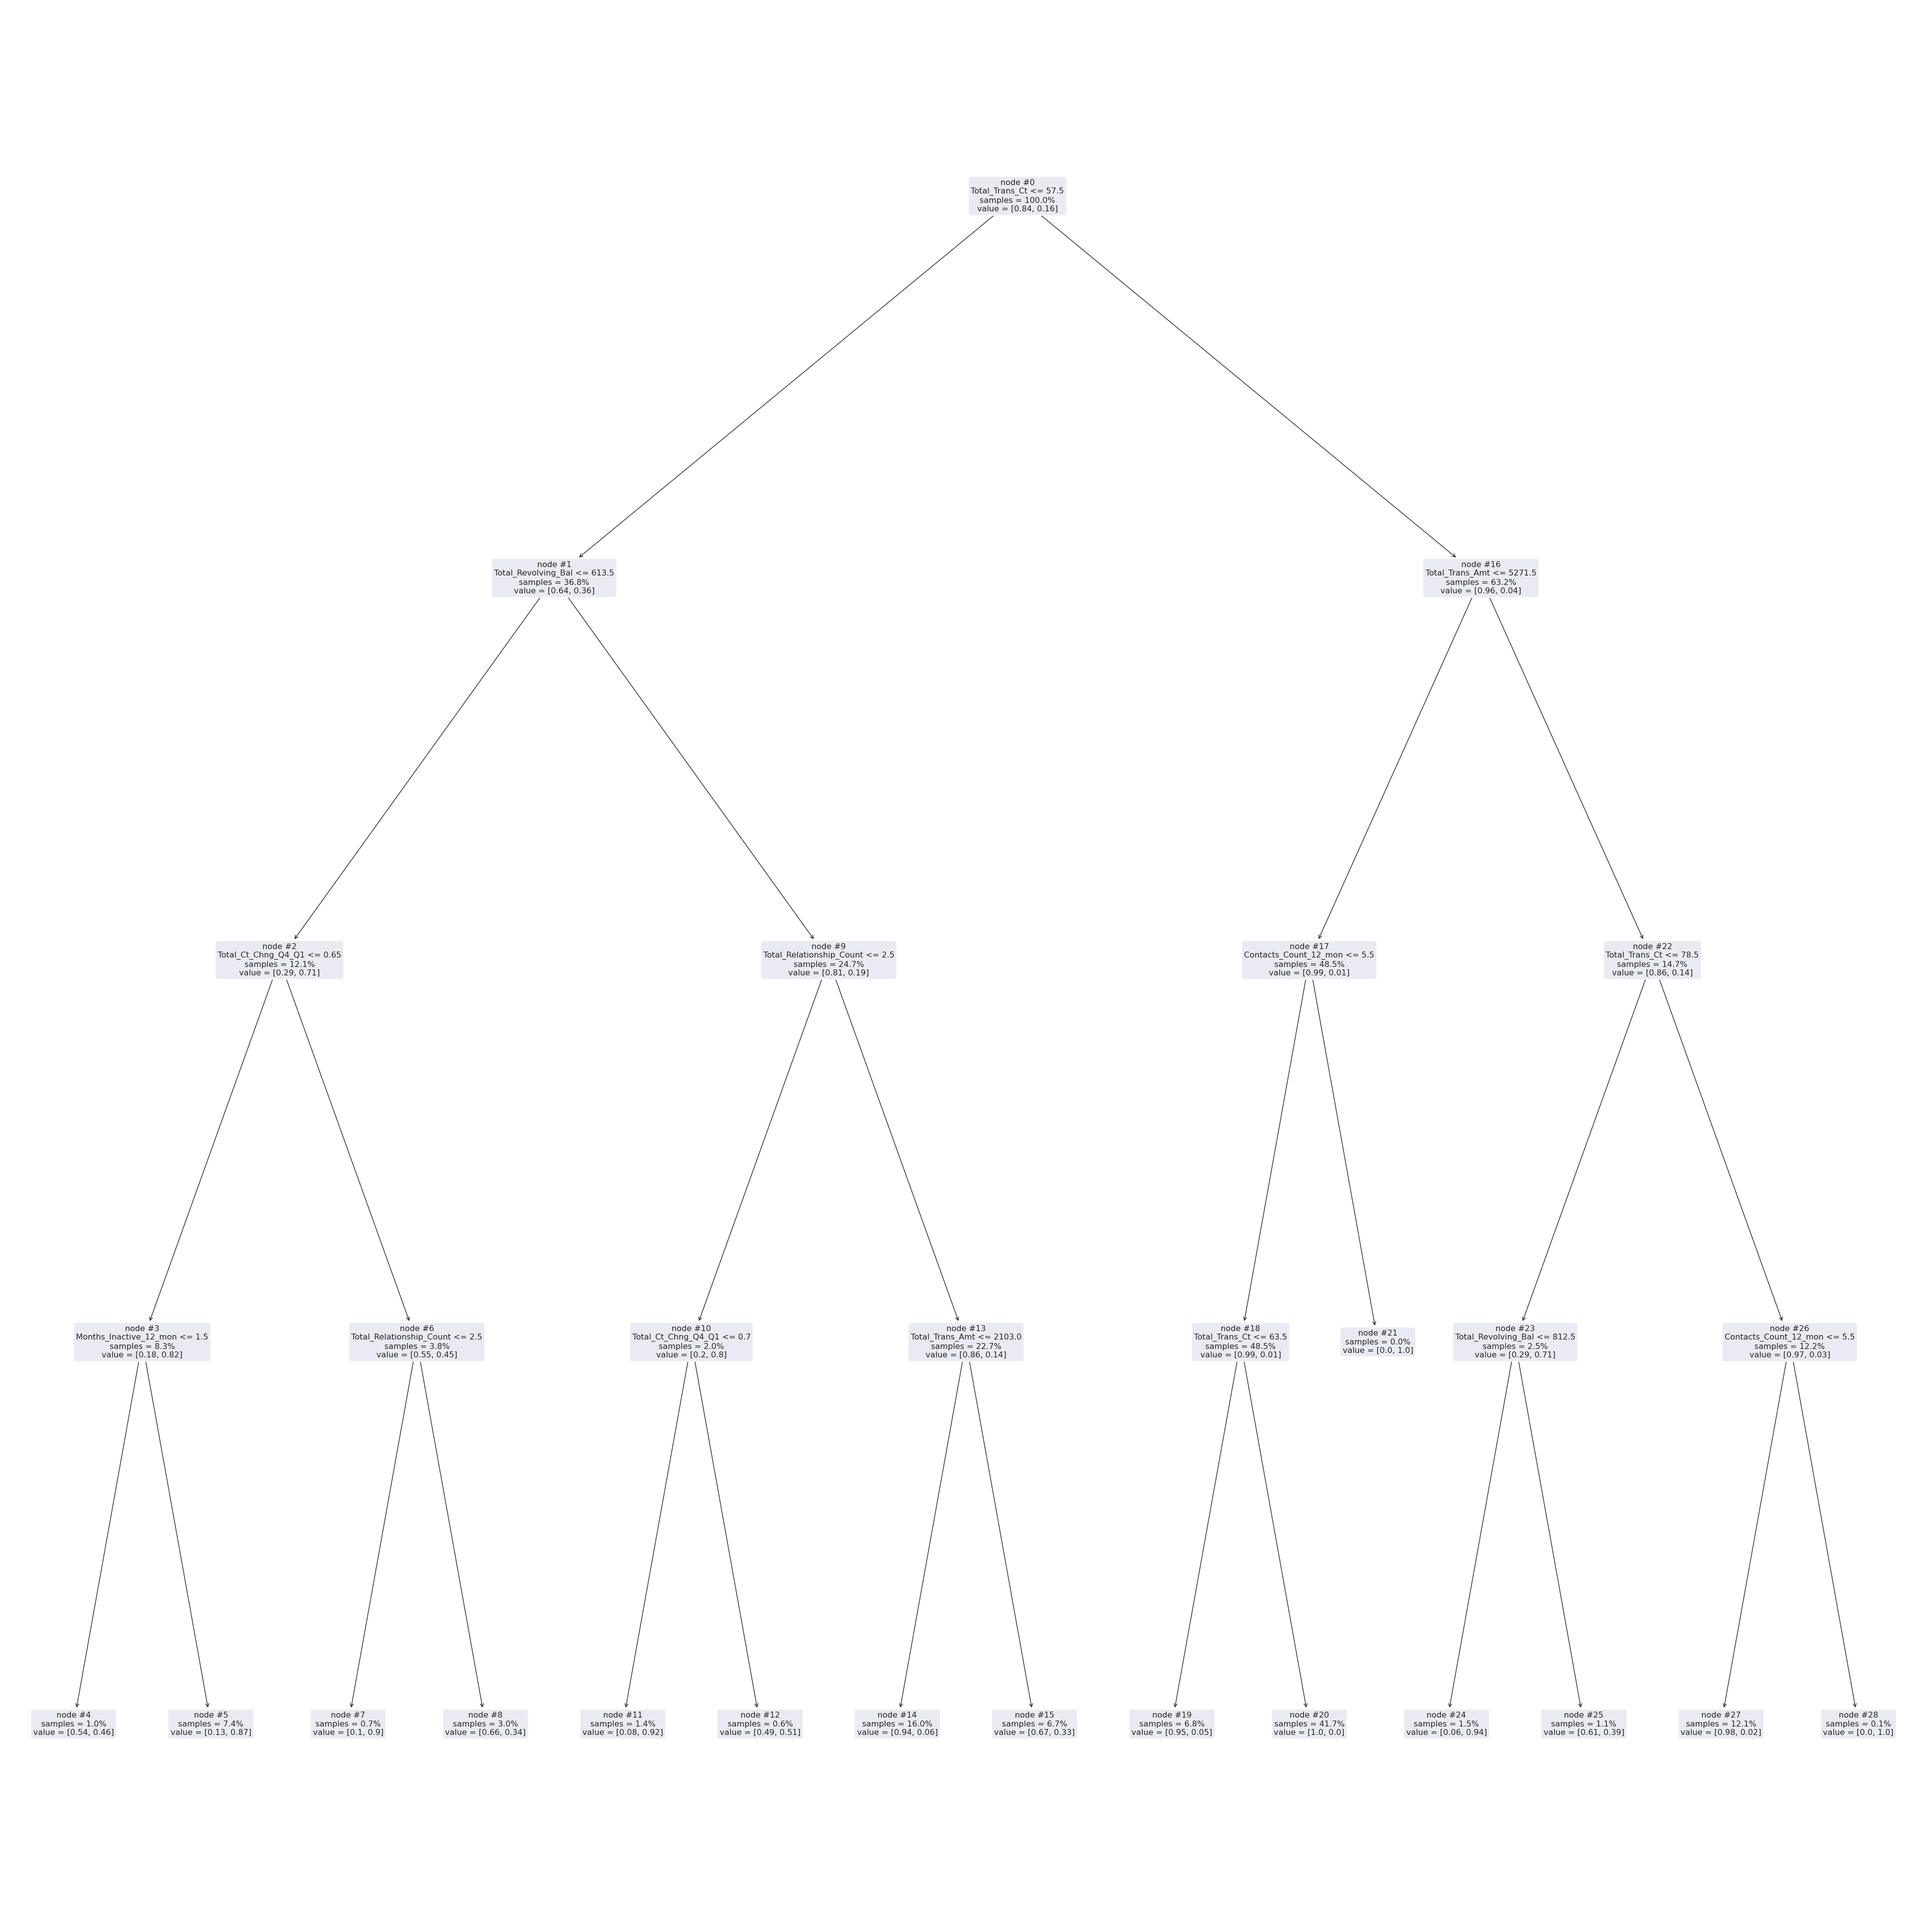

In [ ]:
# Diagrama de arbol
from sklearn.tree import plot_tree
plt.figure(figsize = (50,50))
plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

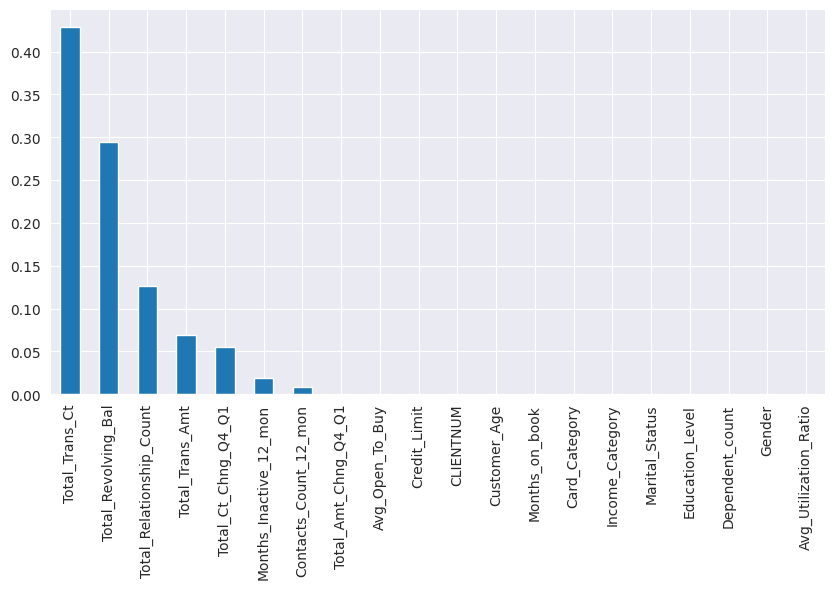

In [ ]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (10,5));

In [ ]:
#Incoporación del scoring al dataframe principal
df_bank['scoring_abandono'] = ac.predict_proba(df_bank.drop(columns = 'Attrition_Flag'))[:, 1]
df_bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,scoring_abandono
0,768805383,0,45,1,3,1,1,3,1,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.058304
1,818770008,0,49,2,5,3,2,1,1,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.058304
2,713982108,0,51,1,3,3,1,4,1,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.339535
3,769911858,0,40,2,4,1,1,1,1,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.058304
4,709106358,0,40,1,3,6,1,3,1,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.339535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,2,2,1,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.022067
10123,710638233,1,41,1,2,3,3,2,1,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.394737
10124,716506083,1,44,2,1,1,1,1,1,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.941748
10125,717406983,1,30,1,2,3,1,2,1,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.941748


In [ ]:
#Los 10 clientes con mayor probabilidad de dejar el banco
df_bank.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,scoring_abandono
9266,719694408,1,30,2,1,2,2,1,1,36,...,6,4541.0,0,4541.0,0.976,7996,80,0.778,0.000,1.000000
9796,768712383,1,51,1,5,3,3,5,1,45,...,6,34516.0,0,34516.0,0.757,8173,91,1.022,0.000,1.000000
9795,710178558,1,46,1,2,1,1,3,2,38,...,6,34516.0,2517,31999.0,0.956,9314,89,0.978,0.073,1.000000
9733,711096633,1,37,2,2,6,1,1,3,29,...,6,12203.0,0,12203.0,0.900,8600,94,0.843,0.000,1.000000
8928,711167808,1,40,1,4,3,2,3,1,30,...,6,18975.0,0,18975.0,1.028,4803,65,0.548,0.000,1.000000
9655,826245858,1,50,1,2,3,2,4,3,40,...,6,34516.0,0,34516.0,0.801,7661,79,1.079,0.000,1.000000
9302,713514633,1,59,1,2,3,2,3,1,50,...,2,6224.0,0,6224.0,0.801,8291,69,1.029,0.000,0.941748
9809,719547033,1,40,1,4,3,1,4,1,31,...,6,23502.0,0,23502.0,0.839,7957,60,0.875,0.000,0.941748
9526,712010358,1,49,1,4,3,2,4,1,36,...,2,3999.0,0,3999.0,0.938,7567,76,0.652,0.000,0.941748
9793,714022833,1,42,2,2,3,2,2,3,32,...,3,17909.0,0,17909.0,0.225,5977,58,0.487,0.000,0.941748


In [ ]:
df_bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,scoring_abandono
0,768805383,0,45,1,3,1,1,3,1,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.058304
1,818770008,0,49,2,5,3,2,1,1,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.058304
2,713982108,0,51,1,3,3,1,4,1,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.339535
3,769911858,0,40,2,4,1,1,1,1,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.058304
4,709106358,0,40,1,3,6,1,3,1,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.339535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,2,2,1,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.022067
10123,710638233,1,41,1,2,3,3,2,1,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.394737
10124,716506083,1,44,2,1,1,1,1,1,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.941748
10125,717406983,1,30,1,2,3,1,2,1,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.941748


In [ ]:
from google.colab import files

df_bank.to_excel('abandono_con_scoring.xlsx') 
files.download('abandono_con_scoring.xlsx')